# <font color=darkcyan> Multivariate linear regression </font>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from sklearn.preprocessing import StandardScaler

It is assumed that for all $1\leqslant i \leqslant n$, 

$$
Y_i = X^\top_i \beta_{\star} + \varepsilon_i\,,
$$

where the $(\varepsilon_i)_{1\leqslant i\leqslant n}$ are i.i.d. random variables in $\mathbb{R}$, $X_i\in\mathbb{R}^d$ and $\beta_{\star}$ is an unknown vector in $\mathbb{R}^d$. Let $Y\in\mathbb{R}^n$ (resp. $\varepsilon\in\mathbb{R}^n$)  be the random vector such that  for all $1\leqslant i \leqslant n$, the $i$-th component of $Y$ (resp. $\varepsilon$) is $Y_i$ (resp. $\varepsilon_i$) and $X\in\mathbb{R}^{n\times d}$ the matrix with line $i$ equal to $X^\top_i$. The model is then written

$$
Y = X \beta_{\star} + \varepsilon\,.
$$

In this section, it is assumed that $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{E}[\varepsilon \varepsilon^\top] = \sigma_{\star}^2 I_n$. The penalized least squares estimate of $\beta_{\star}$ is defined as a solution to

$$
\widehat \beta_n\in  \mathrm{argmin}_{\beta\in\mathbb{R}^d}\,\left( \|Y - X\beta\|_2^2 + \lambda \|\beta\|_2^2\right)\,.
$$

where $\lambda>0$.

<font color=darkred> Explain why the loss function is penalized </font>

Pas d'over-feating, régularisation. XtX est inversible

<font color=darkred> Prove that the bias is given by 
$$
\mathbb{E}[\widehat \beta_n] - \beta_* = - \lambda(X^\top X + \lambda I_d)^{-1}\beta_*\,.
$$</font>

<font color=darkred>Prove that the variance is given by
$$
\mathbb{V}[\widehat \beta_n] = \sigma_\star^2(X^\top X + \lambda I_d)^{-2}X^\top X\,.
$$</font>

#### Import data

In [4]:
import pandas as pd

Data frames can be imported using pandas. This provides two-dimensional and heterogeneous tabular data.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

<font color=darkred>
Import data in the file BRinf using ``read_csv``, display the first rows with ``head`` and the shape of the dataframe using ``shape``.
</font>

In [5]:
df = pd.read_csv('BRinf.csv')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [6]:
# number of observations, number of variables
# 156 observations, 92 colonnes

<font color=darkred>
Use the ``StandardScaler`` of sklearn to preprocess the input variables.
</font>

``StandardScaler`` standardizes the input variables by removing the mean and scaling to unit variance.
We will not analyze closely standardization in this course. However, it is often very useful (even mandatory in some cases) for the stability of learning procedures.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [7]:
df.head()
df = df.iloc[: , 1:]
df.head()



,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,CNI Brazil Manufacture Industr,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,0.0000,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,80.5999,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,-0.3000,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,-0.5000,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,0.0000,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [29]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,CNI Brazil Manufacture Industr,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,5.544611,2.927924,2.771229,1.489195,2.835242,5.079468,-1.322356,-0.932463,-1.379258,-0.076472,...,2.968488,2.018372,8.284390,5.390859,8.236108,3.081977,5.068093,3.727741,5.027370,4.207397
1,3.380223,2.846546,1.794596,0.893958,3.045590,4.573980,-1.369468,-0.794106,-1.104409,12.410897,...,2.010878,0.466161,5.037100,4.065099,5.238860,5.344510,2.402030,2.425692,2.713659,5.014389
2,2.298030,1.625882,1.912466,0.992283,1.686416,3.438705,-1.406394,0.238623,-0.195294,-0.122951,...,0.973468,0.621382,1.256712,1.597711,1.274570,1.667893,1.143946,1.449156,1.332172,2.324414
3,1.470470,0.633076,-0.192348,-0.397281,1.136275,2.858638,-1.347458,0.184269,0.016128,-0.153937,...,0.175459,2.794478,1.519201,1.745018,1.452309,1.950710,0.012660,0.309863,0.103715,2.593412
4,0.324617,-1.287435,-2.010906,-1.629605,-0.837763,2.311717,-1.438226,0.658633,-0.322148,-0.076472,...,1.372472,0.078108,-0.172096,0.014164,-0.163482,0.819443,0.260129,0.472619,0.253938,1.786419


In [9]:
# first coordinate is the number of samples
# second coordinate is the number of input features (+ 1 for the observations)

<font color=darkred>
Build two datasets. 
    ``X_train`` and ``Y_train`` contain the first 140 input data and observations. ``X_test`` and ``Y_test`` contain the remaining input data and observations. We train a linear regression model using ``X_train`` and ``Y_train`` and we assess the performance of the model using ``X_test`` and ``Y_test``. 
</font>

https://pandas.pydata.org/docs/reference/frame.html

In [30]:
nb_data_train = 140
nb_diff       = df.shape[0]-nb_data_train
# inflation observations
X_train, Y_train = data_scaled.iloc[:nb_data_train, 1:] , data_scaled.iloc[:nb_data_train , 0]
X_test, Y_test = data_scaled.iloc[nb_data_train: , 1:] , data_scaled.iloc[nb_data_train: , 0]

#### Regression from scractch

<font color=darkred>
Write a cost function with inputs ``X``, ``Y`` and a regression parameter ``beta``. This function returns the mean squared error between observations and linear predictions.
</font>

In [31]:
def cost_function(X, Y, beta):
    n = len(Y)
    loss = (1/n) * np.sum((Y - X@beta)**2)
    return loss

<font color=darkred>
If we do not use the closed form expression of the estimator, we can minimize the cost function using gradient descent. Write a function ``gradient_descent`` which iteratively minimizes the cost function using gradient descent. The arguments of the function are ``X``, ``Y``, the initial estimate ``beta``, a stepsize ``gamma`` and the maximum number of iterations ``n_it``. The function returns the last parameter estimate and the loss values computed at each iteration.
</font>

In [32]:
def gradient_descent(X, Y, beta, gamma, n_it):
    cost = np.zeros(n_it)
    n = len(Y)
 
    for iteration in range(n_it):
        
        gradient = -(2/n)* X.T @ (Y - X@beta)

        beta = beta - gamma * gradient
        
        cost[iteration] = cost_function(X, Y, beta)
 
    return beta, cost

<font color=darkred>
Run a training using gradient descent and display the cost function along iterations and the parameter estimate. See the influence of gamma.
</font>

In [33]:
# Initial Coefficients
beta = np.zeros(X_train.shape[1])
gamma = 0.01
n_it = 10000
beta_hat, cost = gradient_descent(X_train, Y_train, beta, gamma, n_it)

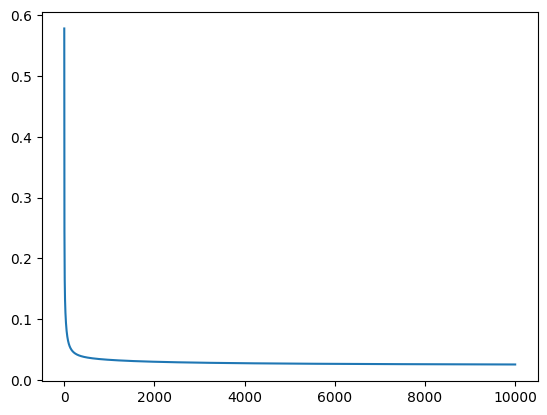

In [14]:
plt.plot(np.arange(n_it) , cost)

<font color=darkred>
Compare the true observations and the predictions on the train and test sets.
</font>

In [34]:
Y_train_pred = X_train@beta_hat
Y_test_pred = X_test@beta_hat

In [35]:
from sklearn.metrics import mean_squared_error , r2_score

def evaluation_modele (Y_true , Y_pred, nom = 'dataset') :
    mse = mean_squared_error(Y_true, Y_pred)
    r2 = r2_score(Y_true, Y_pred)
    print(f" {nom} - Mean Squared Error= {mse:.4f}")
    print(f" {nom} - R² Score= {r2:.4f}\n")

def plot_comparaison (X , Y_true, Y_pred, title):
    plt.plot( np.arange( len(X) ) , Y_true, label = 'Vraie valeurs')
    plt.plot( np.arange( len(X) ) , Y_pred, label = 'Valeurs prédites')
    plt.xlabel('Le temps qui passe')
    plt.ylabel("Valeur de l'inflation")
    plt.title(title)
    plt.legend()
    plt.show()

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)
    plt.xlabel("Vraies valeurs")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.grid()
    plt.show()

In [37]:
evaluation_modele(Y_train, Y_train_pred, "Donnée train")
evaluation_modele(Y_test, Y_test_pred, "Donnée test")

 Donnée train - Mean Squared Error= 0.0256
 Donnée train - R² Score= 0.9720

 Donnée test - Mean Squared Error= 0.2164
 Donnée test - R² Score= 0.7616



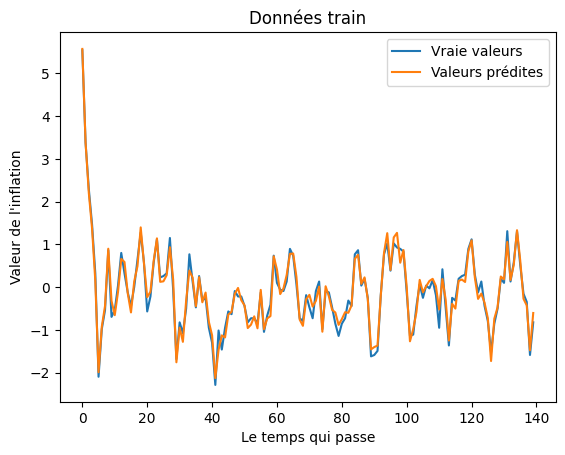

In [38]:
plot_comparaison(X_train , Y_train, Y_train_pred, 'Données train')

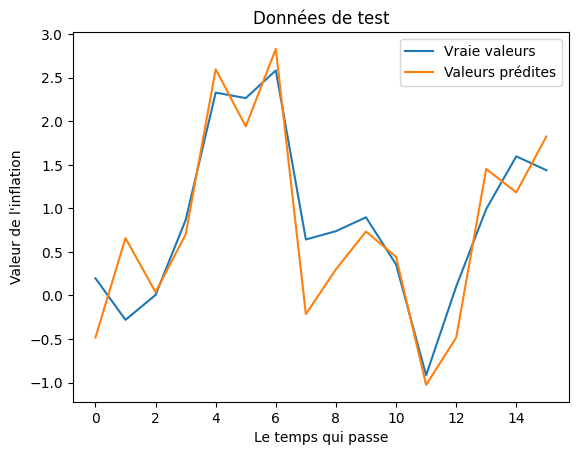

In [39]:
plot_comparaison(X_test, Y_test, Y_test_pred, 'Données de test')

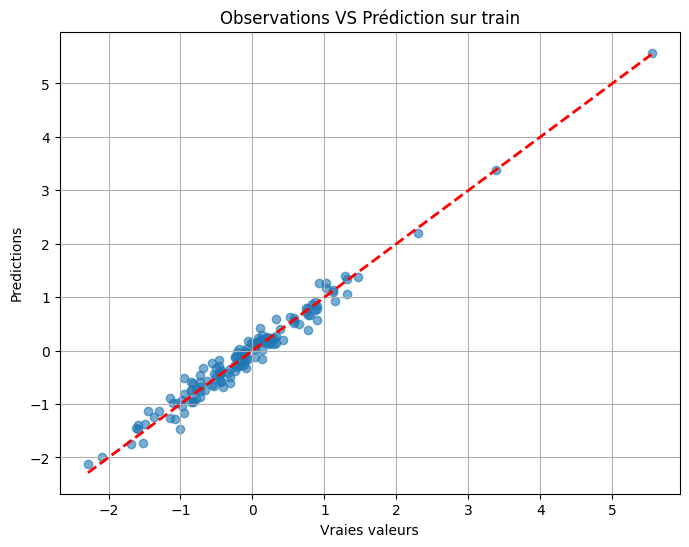

In [40]:
plot_predictions(Y_train , Y_train_pred, 'Observations VS Prédiction sur train')

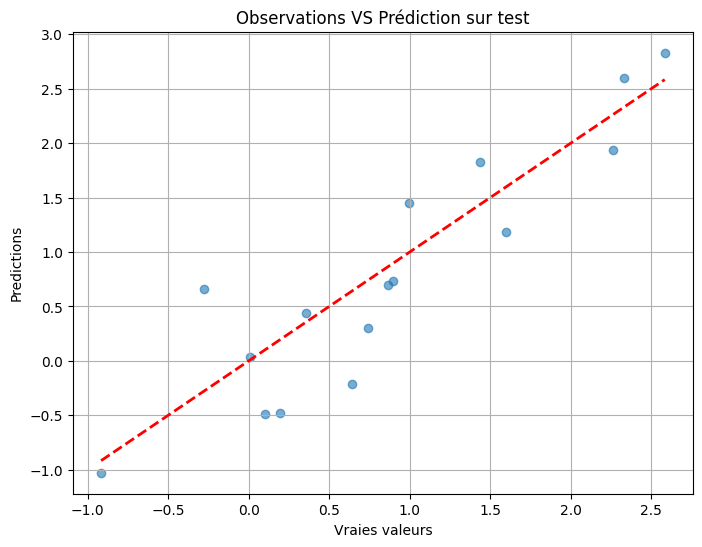

In [42]:
plot_predictions(Y_test , Y_test_pred, 'Observations VS Prédiction sur test')

#### Regression using sklearn

<font color=darkred>
Fit a ``linear_model`` from sklearn to train a linear model (without Ridge penalization).
</font>

 Train avec sklearn - Mean Squared Error= 0.0208
 Train avec sklearn - R² Score= 0.9773

 Test avec sklearn - Mean Squared Error= 4.0335
 Test avec sklearn - R² Score= -3.4432



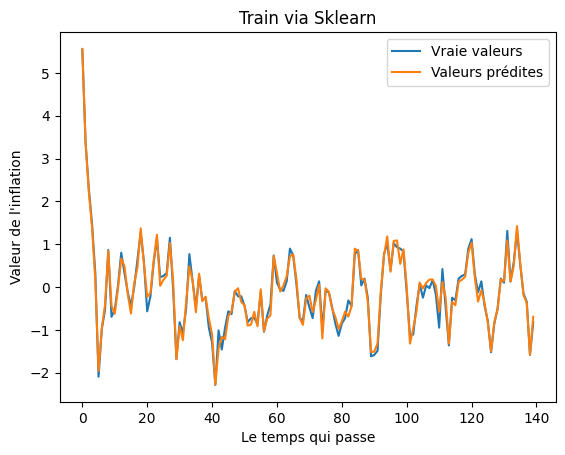

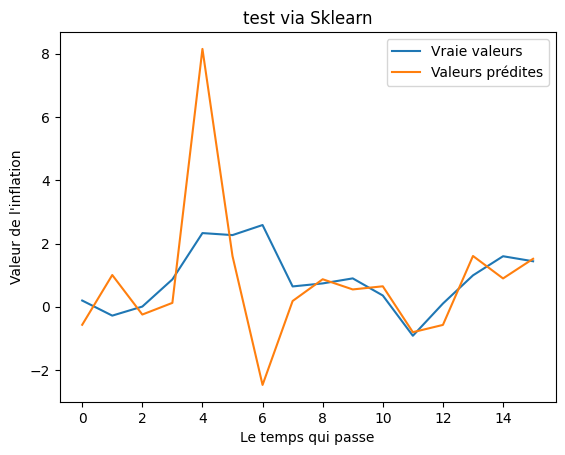

In [43]:
from sklearn import linear_model
reg_lin = linear_model.Ridge(alpha= 0.0)
reg_lin.fit(X_train, Y_train)

Y_train_pred_sklearn = reg_lin.predict(X_train)
Y_test_pred_sklearn = reg_lin.predict(X_test)

evaluation_modele(Y_train, Y_train_pred_sklearn, "Train avec sklearn")
evaluation_modele(Y_test, Y_test_pred_sklearn, "Test avec sklearn")

plot_comparaison(X_train, Y_train, Y_train_pred_sklearn, "Train via Sklearn")
plot_comparaison(X_test, Y_test, Y_test_pred_sklearn, "test via Sklearn")



### Train test split

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

``train_test_split`` splits arrays or matrices into random train and test subsets. It allows to train several times a model with different training set and analyze the variability of the performance on the test set.

<font color=darkred>
Use train_test_split to train 50 times a linear model using 90% of the data to estimate the unknown parameter and 10% to test the performance of the model. 
</font>

Train R²: Mean=0.9792, Std=0.0028
Test R²: Mean=0.4466, Std=0.4475


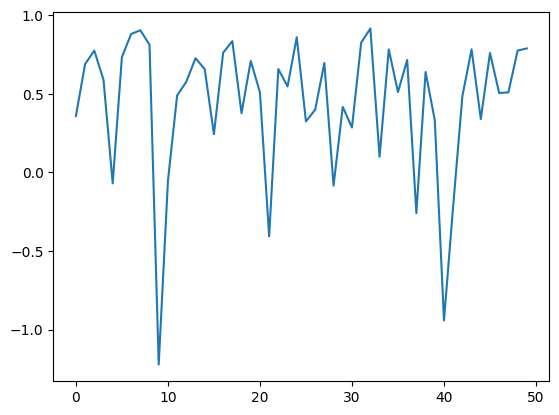

In [72]:
train_scores = []
test_scores = []
n_iterations = 50

for _ in range(n_iterations):
    X_train, X_test, Y_train, Y_test = train_test_split(data_scaled.iloc[:, 1:] , data_scaled.iloc[: , 0], test_size=0.1, random_state=None)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, Y_train)
    
    Y_train_pred = lin_reg.predict(X_train)
    Y_test_pred = lin_reg.predict(X_test)
    
    train_r2 = r2_score(Y_train, Y_train_pred)
    test_r2 = r2_score(Y_test, Y_test_pred)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)

    
print(f"Train R²: Mean={np.mean(train_scores):.4f}, Std={np.std(train_scores):.4f}")
print(f"Test R²: Mean={np.mean(test_scores):.4f}, Std={np.std(test_scores):.4f}")
plt.plot(test_scores)


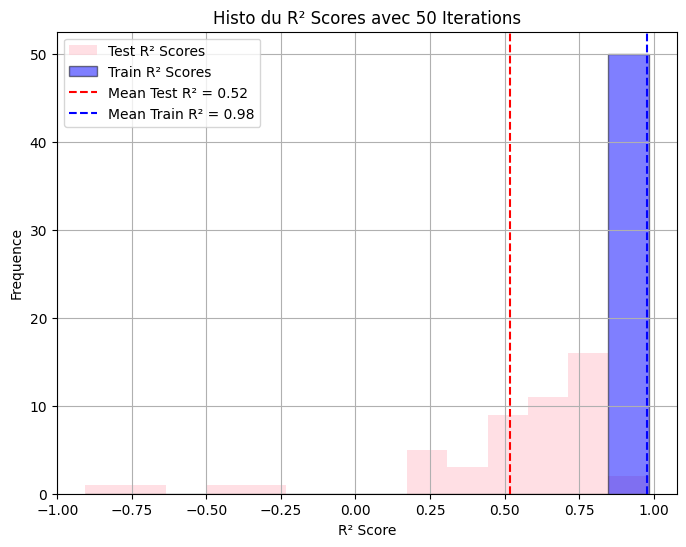

In [70]:
# Visualisation de la distribution des scores R²
plt.figure(figsize=(8, 6))
bins = np.linspace(min(train_scores + test_scores), max(train_scores + test_scores), 15)
plt.hist(test_scores, bins=bins, alpha=0.5, label="Test R² Scores", color ='pink')
plt.hist(train_scores, bins=bins, alpha=0.5, label="Train R² Scores", color = 'b', edgecolor = 'black')
plt.axvline(np.mean(test_scores), color='r', linestyle='dashed', label=f"Mean Test R² = {np.mean(test_scores):.2f}")
plt.axvline(np.mean(train_scores), color='b', linestyle='dashed', label=f"Mean Train R² = {np.mean(train_scores):.2f}")
plt.xlabel("R² Score")
plt.ylabel("Frequence")
plt.title("Histo du R² Scores avec 50 Iterations")
plt.legend()
plt.grid()
plt.show()